# Stochastic Calculus

## Introduction

This chapter introduces **Itô integrals**, which are essential in **continuous-time stochastic processes**, particularly in **financial modeling**. Unlike ordinary calculus, Itô calculus accounts for the **quadratic variation** of Brownian motion, which is responsible for the **volatility term** in the **Black-Scholes-Merton equation**. 

The Itô integral models the **value of a portfolio in continuous time**, where the integrand represents the **trading strategy**, and the integral itself represents the **cumulative gain or loss** from trading. The key result is that this integral follows a **martingale property**, meaning that it has an **expected value of zero** under a probability measure.

This chapter does not discuss **risk-neutral pricing** but focuses on **hedging** through stochastic calculus.

---

## Itô's Integral for Simple Integrands

### **Trading Strategy Interpretation**

To develop the Itô integral, consider a **trading strategy** where an investor adjusts their position $\Lambda(t)$ in an asset whose price follows a **Brownian motion** $W(t)$. The **gain process** $I(t)$ represents the **profit or loss** from trading up to time $t$.

1. **From $t_0$ to $t_1$**:  
   The initial position is $\Lambda(t_0)$, and the asset price changes from $W(t_0)$ to $W(t)$. The gain is:

   $$
   I(t) = \Lambda(t_0) [W(t) - W(t_0)], \quad t_0 \leq t \leq t_1.
   $$

2. **From $t_1$ to $t_2$**:  
   At $t_1$, the trader **updates their position** to $\Lambda(t_1)$. The gain now includes both the previous gain and the new trading activity:

   $$
   I(t) = \Lambda(t_0) W(t_1) + \Lambda(t_1) [W(t) - W(t_1)], \quad t_1 \leq t \leq t_2.
   $$

3. **From $t_2$ to $t_3$**:  
   At $t_2$, the trader **updates their position** again to $\Lambda(t_2)$. The total gain now becomes:

   $$
   I(t) = \Lambda(t_0) W(t_1) + \Lambda(t_1) [W(t_2) - W(t_1)] + \Lambda(t_2) [W(t) - W(t_2)], \quad t_2 \leq t \leq t_3.
   $$

### **Itô’s Approach to Defining the Integral**

To define the integral rigorously, Itô devised a way to **bypass the nondifferentiability** of Brownian motion. The idea is to first define the **Itô integral for simple integrands** and then extend it to general processes.

#### **Step 1: Defining the Integral for Simple Processes**
Consider a **partition** $\Pi = \{t_0, t_1, ..., t_n\}$ of $[0, T]$:

$$
0 = t_0 < t_1 < \dots < t_n = T.
$$

A process $\Lambda(t)$ is called a **simple process** if it is **piecewise constant**, meaning that it takes constant values on each subinterval $[t_j, t_{j+1})$:

$$
\Lambda(t) = \sum_{j=0}^{n-1} \Lambda(t_j) \mathbf{1}_{[t_j, t_{j+1})}(t).
$$

For such a process, the **discrete approximation of the integral** is:

$$
I(T) = \sum_{j=0}^{n-1} \Lambda(t_j) [W(t_{j+1}) - W(t_j)].
$$

#### **Step 2: Generalization to Continuous Processes**
To extend this definition to **non-simple integrands**, we take a **limit** where $\Lambda(t)$ is approximated by a sequence of simple processes. In the limit as the partition gets finer, the integral is defined as:

$$
I(T) = \lim_{\|\Pi\| \to 0} \sum_{j=0}^{n-1} \Lambda(t_j) [W(t_{j+1}) - W(t_j)].
$$

which leads to the **final continuous-time integral formulation**:

$$
I(T) = \int_0^T \Lambda(t) dW(t).
$$

Here, $\Lambda(t)$ is a **stochastic process** (adapted to the filtration $\mathcal{F}(t)$), and $W(t)$ is a **Brownian motion**.

---

### Properties of the Itô Integral

#### **1. Martingale Property**
The Itô integral is a **martingale**, meaning that its expectation remains unchanged given past information:

$$
\mathbb{E}[I(t) | \mathcal{F}(s)] = I(s), \quad \text{for } 0 \leq s \leq t.
$$

Since Brownian motion has **zero drift**, the integral has **no predictable trend**.

#### **2. Itô Isometry**
The variance of the Itô integral satisfies the following fundamental identity:

$$
\mathbb{E} I^2(T) = \mathbb{E} \int_0^T \Lambda^2(u) du.
$$

This result, known as the **Itô isometry**, is crucial in proving the **convergence** of the integral.

#### **3. Quadratic Variation**
The **quadratic variation** of the Itô integral is given by:

$$
[I, I](t) = \int_0^t \Lambda^2(u) du.
$$

Unlike variance (which is an expectation over many paths), quadratic variation is **path-dependent** and measures the **realized volatility** of the process.

### Differential Notation

The Itô integral can also be written in **differential form**:

$$
dI(t) = \Lambda(t) dW(t).
$$

Squaring both sides using the **Itô rule**, we get:

$$
dI(t) dI(t) = \Lambda^2(t) dt.
$$

This confirms that the Itô integral accumulates **quadratic variation** at a rate of $\Lambda^2(t)$ per unit time.

Consequently, we can define the following:

- The Itô integral **extends calculus** to stochastic processes, making it essential for modeling financial derivatives.
- The **martingale property** ensures that the integral has no predictable drift.
- The **quadratic variation** captures the **path-dependent** nature of stochastic volatility.


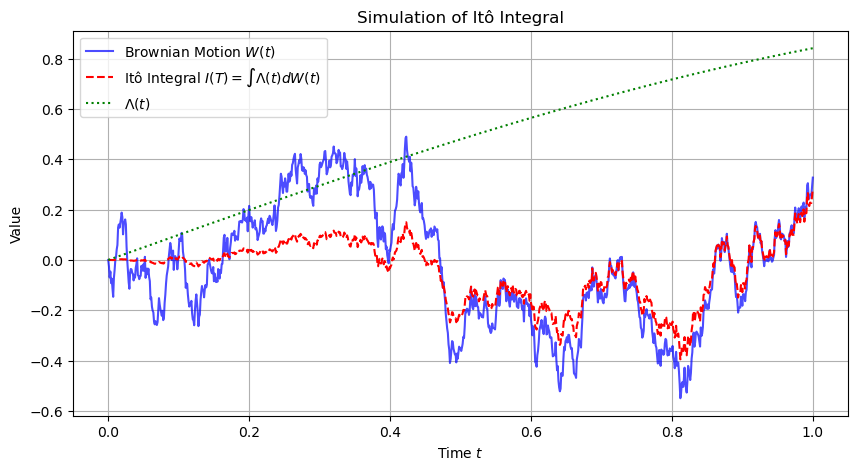

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 1.0          # Time horizon
N = 1000         # Number of time steps
dt = T / N       # Time step size
t = np.linspace(0, T, N+1)  # Time grid

# Generate Brownian motion (Wiener process)
dW = np.random.normal(0, np.sqrt(dt), size=N)  # Brownian increments
W = np.concatenate(([0], np.cumsum(dW)))       # Brownian path

# Define the process Λ(t) (e.g., a function of time)
Lambda = np.sin(t)  # Example: Sinusoidal process

# Compute the Itô integral approximation using Euler sum
Ito_integral = np.cumsum(Lambda[:-1] * dW)  # Sum of Λ(t) * dW
Ito_integral = np.concatenate(([0], Ito_integral))  # Start at zero

# Plot results
plt.figure(figsize=(10,5))
plt.plot(t, W, label="Brownian Motion $W(t)$", color='blue', alpha=0.7)
plt.plot(t, Ito_integral, label="Itô Integral $I(T) = \int \Lambda(t) dW(t)$", color='red', linestyle="dashed")
plt.plot(t, Lambda, label=r"$\Lambda(t)$", color='green', linestyle="dotted")
plt.xlabel("Time $t$")
plt.ylabel("Value")
plt.legend()
plt.title("Simulation of Itô Integral")
plt.grid()
plt.show()


This Python script simulates the **Itô integral**:

$$
I(T) = \int_0^T \Lambda(t) dW(t)
$$

where:
- $W(t)$ is a **Brownian motion** (Wiener process),
- $\Lambda(t)$ is a **stochastic process** (in this case, $\sin(t)$),
- The integral is approximated using a **discrete sum**.

The simulation follows a **numerical approach** based on the **Euler-Maruyama method**.

We do the following:

#### Simulation of the Brownian Motion:

This code simulates a brownian motion:

```python
dW = np.random.normal(0, np.sqrt(dt), size=N)  # Brownian increments
W = np.concatenate(([0], np.cumsum(dW)))       # Brownian path
```

where:

 - $dW \sim \mathcal{N}(0, \sqrt{dt})$: Generates Brownian motion increments using a normal distribution with Mean 0 (centered at zero) and the Standard deviation $\sqrt{dt}$ (scaling for continuous-time behavior).
 - $W(t)$: The Brownian path is computed as the cumulative sum of these increments.

This follows the discretization of Brownian motion:

- $W(t_{j+1}) = W(t_j) + dW_j$

#### Define the process $\Lambda$

This code defines the process $\Lambda$:

```python
Lambda = np.sin(t) 
```

where:

-$\Lambda(t)$ represents the integrand in the Itô integral.
  - Here, we choose $\Lambda(t) = \sin(t)$ as an example.

This function modulates the impact of Brownian motion on the integral.

#### Computing the Ito Integral approximation

This code computes the Ito integral approximation:

```python
Ito_integral = np.cumsum(Lambda[:-1] * dW)  # Sum of Λ(t) * dW
Ito_integral = np.concatenate(([0], Ito_integral))  # Start at zero
```

Where we compute the Ito integral approximation as the Euler sum approximation:

- $I(T) \approx \sum_{j=0}^{N-1}\Lambda(t_j)dW_j$
- The Itô integral is numerically computed as the cumulative sum of $\Lambda(t) \cdot dW$.
- The integral starts at zero: $I(0) = 0$.

##  Itô's Integral for General Integrands

### **Generalization of the Itô Integral**
Previously, the **Itô integral** was defined for **simple processes** $\Lambda(t)$ that are piecewise constant. 

In reality, most stochastic processes **are not piecewise constant**. Instead, they:
- **Vary continuously** (e.g., $\Lambda(t) = \sin(t)$).
- **Have jumps** (e.g., processes with sudden price changes).

For these cases, we cannot directly apply the sum formula used for simple integrands.

This generalization allows **a broader class of stochastic processes** to be integrated while preserving the essential properties of the Itô integral.

####  **Key Conditions for Itô Integration**
To ensure mathematical well-posedness, $\Lambda(t)$ must satisfy:
1. **Adaptivity**: $\Lambda(t)$ must be **$\mathcal{F}(t)$-measurable**, meaning it only depends on past information.
2. **Square-Integrability**: The integral must satisfy the **finite variance condition**:
   $$
   \mathbb{E} \int_0^T \Lambda^2(t) dt < \infty.
   $$

---

### **Approximating General Integrands**
To define the integral rigorously, we **approximate $\Lambda(t)$ using simple processes**:
1. **Partition the time interval**: $0 = t_0 < t_1 < \dots < t_n = T$.
2. **Construct a simple approximation**: Define a sequence of step functions $\Lambda_n(t)$, where:
   - $\Lambda_n(t) = \Lambda(t_j)$ for $t_j \leq t < t_{j+1}$.
   - This process remains **constant on subintervals**.

As the **partition gets finer** ($\max |t_{j+1} - t_j| \to 0$), the simple process **converges** to the general process:

$$
\lim_{n \to \infty} \mathbb{E} \int_0^T |\Lambda_n(t) - \Lambda(t)|^2 dt = 0.
$$

Thus, we define the **Itô integral for general integrands** as the limit:

$$
\int_0^T \Lambda(t) dW(t) = \lim_{n \to \infty} \int_0^T \Lambda_n(t) dW(t).
$$

This integral **inherits all properties** of the Itô integral for simple processes.

---

### **Properties of the Itô Integral for General Integrands**
The Itô integral $I(t) = \int_0^t \Lambda(u) dW(u)$ satisfies:

1. **(Continuity)**: The paths of $I(t)$ are **continuous**.
2. **(Adaptivity)**: $I(t)$ is **$\mathcal{F}(t)$-measurable**.
3. **(Linearity)**: If $I(t) = \int_0^t \Lambda(u) dW(u)$ and $J(t) = \int_0^t F(u) dW(u)$, then:
   $$
   I(t) \pm J(t) = \int_0^t (\Lambda(u) \pm F(u)) dW(u), \quad cI(t) = \int_0^t c\Lambda(u) dW(u).
   $$
4. **(Martingale Property)**: $I(t)$ is a **martingale**.
5. **(Itô Isometry)**: The second moment is given by:
   $$
   \mathbb{E} I^2(t) = \mathbb{E} \int_0^t \Lambda^2(u) du.
   $$
6. **(Quadratic Variation)**: The quadratic variation process is:
   $$
   [I, I](t) = \int_0^t \Lambda^2(u) du.
   $$

---

### **Example: Computing $\int_0^T W(t) dW(t)$**


#### **1. Goal**
We aim to compute the Itô integral:

$$
I(T) = \int_0^T W(t) dW(t),
$$

where $W(t)$ is a **standard Brownian motion**.

Since Brownian motion is **not differentiable**, we approximate this integral using **simple processes** and take the limit.

---

#### **2. Stepwise Approximation of $W(t)$**

To rigorously define the integral, we approximate $W(t)$ by a **piecewise constant function**.

##### **2.1. Partitioning the Interval**

- Divide $[0,T]$ into **$n$ equal subintervals**:
  
  $$
  0 = t_0 < t_1 < t_2 < \dots < t_n = T,
  $$
  
  where:

  $$
  t_j = \frac{jT}{n}, \quad j = 0, 1, \dots, n.
  $$

- Define a **stepwise approximation** of $W(t)$, denoted by $\Lambda_n(t)$:

  $$
  \Lambda_n(t) =
  \begin{cases} 
    W(0) = 0, & 0 \leq t < \frac{T}{n}, \\ 
    W\left(\frac{kT}{n}\right), & \frac{kT}{n} \leq t < \frac{(k+1)T}{n}.
  \end{cases}
  $$

Thus, $\Lambda_n(t)$ is **piecewise constant**, meaning that it takes the value of **$W(t)$ at the left endpoint of each subinterval**.

---

### **3. Approximating the Integral as a Sum**
For each partition, we approximate the integral as:

$$
I_n(T) = \sum_{j=0}^{n-1} W(t_j) [W(t_{j+1}) - W(t_j)].
$$

#### **Interpretation:**
- **$W(t_j)$** is the **left-endpoint value** of the Brownian motion in subinterval $[t_j, t_{j+1}]$.
- **$[W(t_{j+1}) - W(t_j)]$** represents the **increment** over that interval.
- **Summing these products** gives an approximation to the Itô integral.

---

### **4. Expanding the Itô Integral Using Quadratic Variation**
To analyze the sum:

$$
\sum_{j=0}^{n-1} W(t_j) [W(t_{j+1}) - W(t_j)],
$$

we use the **identity**:

$$
W(t_j) W(t_{j+1}) = \frac{1}{2} \left(W^2(t_{j+1}) + W^2(t_j) - (W(t_{j+1}) - W(t_j))^2\right).
$$

Rearranging:

$$
W(t_j) [W(t_{j+1}) - W(t_j)] = \frac{1}{2} [W^2(t_{j+1}) - W^2(t_j)] - \frac{1}{2} (W(t_{j+1}) - W(t_j))^2.
$$

Summing over all $j$:

$$
\sum_{j=0}^{n-1} W(t_j) [W(t_{j+1}) - W(t_j)]
= \frac{1}{2} [W^2(T) - W^2(0)] - \frac{1}{2} \sum_{j=0}^{n-1} (W(t_{j+1}) - W(t_j))^2.
$$

Since **Brownian motion accumulates quadratic variation at rate $dt$**, we have:

$$
\sum_{j=0}^{n-1} (W(t_{j+1}) - W(t_j))^2 \approx T.
$$

Thus, in the limit as $n \to \infty$:

$$
\int_0^T W(t) dW(t) = \frac{1}{2} W^2(T) - \frac{1}{2}T.
$$

---

### **5. Understanding the Extra Term $-\frac{1}{2}T$**
#### **(a) Why This Doesn't Happen in Ordinary Calculus**
For a differentiable function $g(t)$, integration by parts gives:

$$
\int_0^T g(t) dg(t) = \frac{1}{2} g^2(T).
$$

This works because **in ordinary calculus, the squared increments vanish** as step sizes shrink:

$$
\sum_{j} (g(t_{j+1}) - g(t_j))^2 \to 0.
$$

However, **for Brownian motion**:

$$
\sum_{j} (W(t_{j+1}) - W(t_j))^2 \to T.
$$

This is the fundamental difference: **Brownian motion accumulates quadratic variation at a rate of $dt$**, while a differentiable function does not.

#### **(b) Why Itô Integration Uses Left-End Evaluation**
In the Itô integral:

$$
I(T) = \lim_{n \to \infty} \sum_{j=0}^{n-1} W(t_j) [W(t_{j+1}) - W(t_j)],
$$

the function $W(t_j)$ is evaluated **at the left endpoint**. This is crucial because:
- It ensures **adaptedness** (we cannot use future information).
- It causes **correlation between $W(t_j)$ and the increment $[W(t_{j+1}) - W(t_j)]$**.

If we instead evaluated at **midpoints** (as in the **Stratonovich integral**), the correction term would disappear, and the result would match ordinary calculus.

---

### **6. Comparing Itô and Stratonovich Integrals**
A key distinction in stochastic calculus is between:
- The **Itô integral** $\int_0^T W(t) dW(t)$ (evaluates at the left endpoint).
- The **Stratonovich integral** $\int_0^T W(t) \circ dW(t)$ (evaluates at the midpoint).

If we had used **midpoints** instead of left-endpoints, the extra term would disappear:

$$
\int_0^T W(t) \circ dW(t) = \frac{1}{2} W^2(T).
$$

Thus, **the choice of evaluation point affects the integral’s result**.

---

### **7. Summary: Why the Additional Term Appears**
1. **Brownian motion has nonzero quadratic variation**:
   - Unlike smooth functions, it satisfies:
     $$
     [W, W](T) = T.
     $$

2. **The Itô integral accumulates a correction term due to quadratic variation**:
   - When summing discrete increments:
     $$
     W(t_j) [W(t_{j+1}) - W(t_j)] = \frac{1}{2} [W^2(t_{j+1}) - W^2(t_j)] - \frac{1}{2} (W(t_{j+1}) - W(t_j))^2.
     $$
   - The second term contributes **$-\frac{1}{2}T$**.

3. **Itô vs. Stratonovich Integration**:
   - The Itô integral evaluates at **left endpoints** (causing the correction).
   - The Stratonovich integral evaluates at **midpoints**, avoiding the correction.

4. **Final Result**:
   - For a differentiable function: $\int_0^T g(t) dg(t) = \frac{1}{2} g^2(T)$.
   - For Brownian motion: $\int_0^T W(t) dW(t) = \frac{1}{2} W^2(T) - \frac{1}{2} T$.

---

### Key Differences Between Simple and General Integrands**
| Feature               | Simple Integrands                              | General Integrands                          |
|-----------------------|---------------------------------|---------------------------------|
| **Definition**        | Stepwise constant function     | Arbitrary adapted function  |
| **Computation**       | Finite sum                      | Limit of stepwise approximations |
| **Approximation**     | Defined exactly on partitions  | Approximated by simple processes |
| **Quadratic Variation** | Defined directly via sums      | Defined via limit of sums |
| **Common Example**   | Trading with fixed adjustments | Continuous trading strategy |

